## Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib notebook

<IPython.core.display.Javascript object>


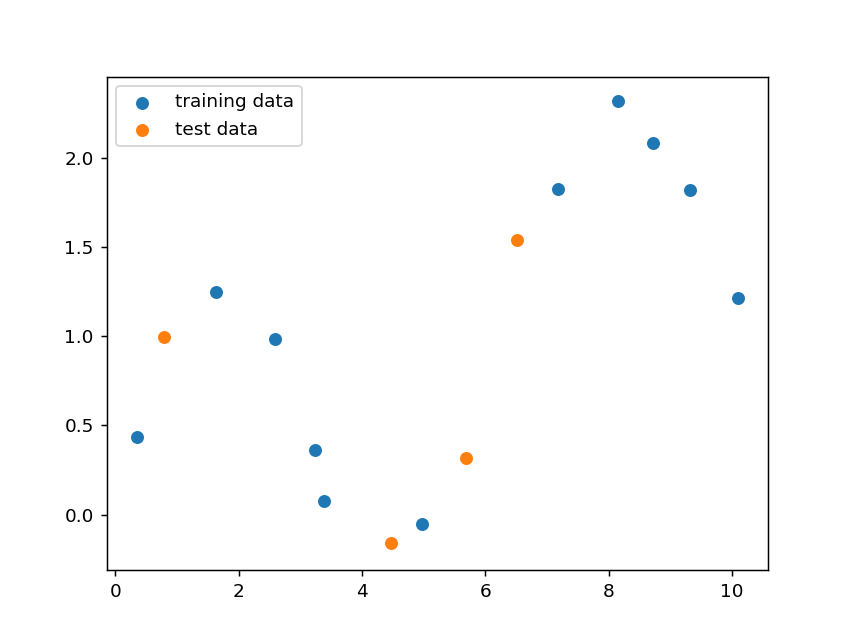

In [3]:
#Generate some random data for fitting various models
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend();

In [10]:
x = x.reshape(-1,1)

def fit_polys():
    """
    Fits a polynomial LinearRegression model on the training data for degrees 1, 3, 6, and 9
    """
    final_ans = np.empty((4,100))
    for i, deg in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree=deg, include_bias=False)
        x_poly = poly.fit_transform(x)

        X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

        linreg = LinearRegression()
        linreg.fit(X_train,y_train)

        final_ans[i] = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(-1,1))).reshape(1,-1)

    return final_ans
    
#fit_polys()

<IPython.core.display.Javascript object>


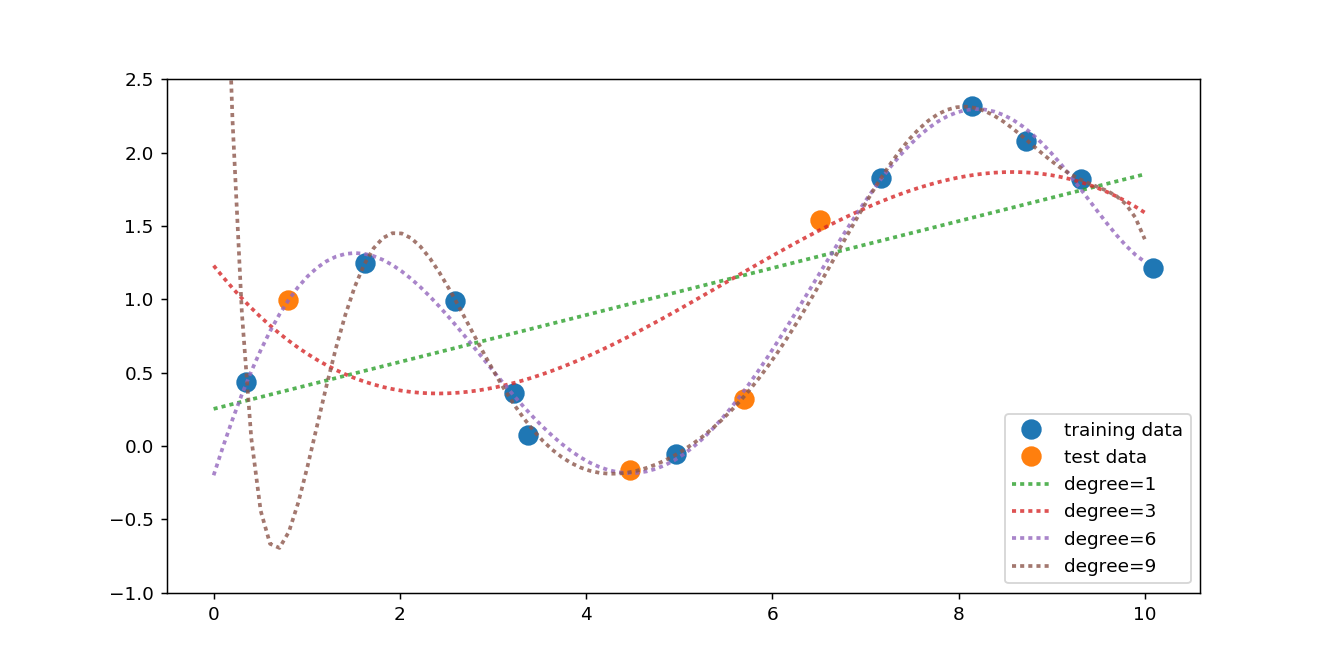

In [11]:
def plot_one(degree_predictions):
    """
    plot the results from above
    """
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, ls=':', 
                 label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend()

plot_one(fit_polys())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [47]:
def fit_polys_two():
    """
    Fits a polynomial LinearRegression model on the training data for degrees 0 through 9 and calcs R2 values
    for train, test and lasso.
    """
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
    final_results = {}

    for i, deg in enumerate(range(1,10)):
        poly = PolynomialFeatures(degree=deg, include_bias=False)
        x_poly = poly.fit_transform(x)

        X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

        linreg = LinearRegression()
        linreg.fit(X_train,y_train)
        
        lasso = Lasso(alpha=0.05, max_iter=10000000, tol=0.05)
        lasso.fit(X_train,y_train)

        r2_train = r2_score(y_train, linreg.predict(X_train))
        r2_test = r2_score(y_test, linreg.predict(X_test))
        r2_test_lasso = r2_score(y_test, lasso.predict(X_test))
        
        final_results[i+1] = (r2_train, r2_test, r2_test_lasso)
        
    return final_results

#fit_polys_two()

In [48]:
results = fit_polys_two()

### Plot the $R^2$ of Test, Train and Lasso Test Data:

<IPython.core.display.Javascript object>


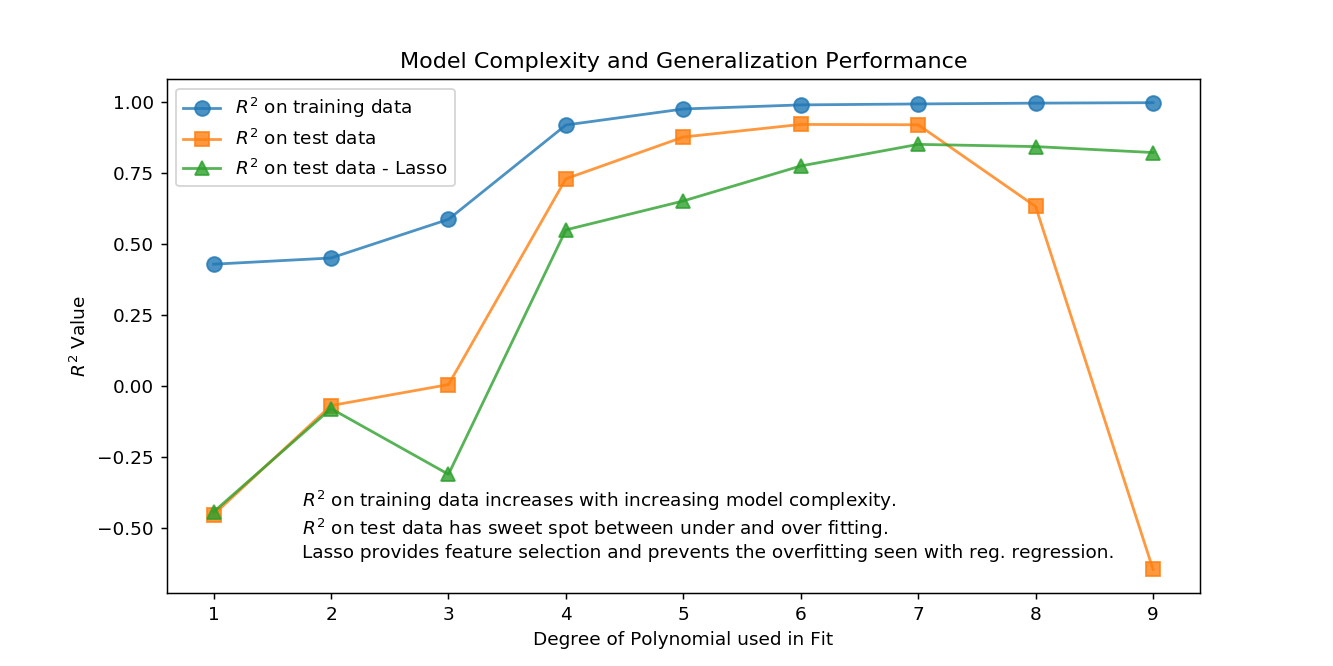

In [49]:
r2_train = [x[0] for x in results.values()]
r2_test = [x[1] for x in results.values()]
r2_test_lasso = [x[2] for x in results.values()]
plt.figure(figsize=(10,5))
plt.plot([x for x in range(1,10)], r2_train, '-o', label='$R^2$ on training data', markersize=8, alpha=0.8)
plt.plot([x for x in range(1,10)], r2_test, '-s', label='$R^2$ on test data', markersize=8, alpha=0.8)
plt.plot([x for x in range(1,10)], r2_test_lasso, '-^', label='$R^2$ on test data - Lasso', markersize=8, alpha=0.8)
plt.legend()
plt.xlabel('Degree of Polynomial used in Fit')
plt.ylabel('$R^2$ Value')
plt.title('Model Complexity and Generalization Performance')
plt.text(1.75,-0.6,"$R^2$ on training data increases with increasing model complexity."
         "\n$R^2$ on test data has sweet spot between under and over fitting."
         "\nLasso provides feature selection and prevents the overfitting seen with reg. regression.");